# Analysis
* This notebook cleans code for analyzing 'parsed1.csv'
* Contains some preliminary analysis.

In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regex as re

In [7]:
df = pd.read_csv("../Data/parsed1.csv", index_col = 0)
df.drop(columns = ['docket_no'], inplace = True)

In [8]:
df.head()

,offenses,offense_date,arrest_dt,case_status,arresting_officer,attorney,dob,zip,bail_set_by,bail_amount,bail_paid,bail_date,bail_type,prelim_hearing_dt,prelim_hearing_time,parsed_offenses
0,"['Rape Forcible Compulsion', 'Rape Forcible Co...",5/28/20,7/27/20,Active,"Bengochea, William",Defender Association of Philadelphia,5/19/93,19123,"Bernard, Francis X.",300000,0,7/28/20,Monetary,7/28/20,4:49 AM,"['False Imprisonment', 'Indec Asslt-W/O Cons O..."
1,['Aggravated Assault - Attempts to cause SBI o...,5/4/20,5/4/20,Active,"Soares, Baldomiro J. Jr.",Defender Association of Philadelphia,5/5/97,19121,E-Filing Judge,50000,5000,5/5/20,Monetary,5/4/20,5:33 PM,['Aggravated Assault - Attempts to cause SBI o...
2,"['Simple Assault', 'Simple Assault', 'Reckless...",2/2/20,2/12/20,Active,"Jones, James",Defender Association of Philadelphia,11/15/86,19124,"Stack, Patrick",7500,750,2/13/20,Monetary,2/13/20,8:22 AM,"['Recklessly Endangering Another Person', 'Sim..."
3,"['Contraband/Controlled Substance', 'Contraban...",2/10/20,2/21/20,Active,"Balmer, James M.",Defender Association of Philadelphia,12/13/80,19135,"Bernard, Francis X.",5000,0,2/21/20,Unsecured,2/21/20,8:34 PM,"['Contraband/Controlled Substance', 'Int Poss ..."
4,"['Manufacture, Delivery, or Possession With In...",3/13/20,3/14/20,Active,"Sima, Raymond",Richard T. Brown Jr.,11/5/97,19144,"Stack, Patrick",0,0,3/14/20,ROR,3/14/20,8:40 AM,"['Conspiracy', 'Int Poss Contr Subst By Per No..."


In [9]:
# convert string to datetime
#df["offense_date"] = pd.to_datetime(df["offense_date"])
df["arrest_dt"] = pd.to_datetime(df["arrest_dt"])
df["dob"] = pd.to_datetime(df["dob"])
df["bail_date"] = pd.to_datetime(df["bail_date"])
df["prelim_hearing_dt"] = pd.to_datetime(df["prelim_hearing_dt"])

# public defender column: 1 if public defender, 0 if private defender
df["public_defender"] = df["attorney"].apply(lambda x: 1 if x =='Defender Association of  Philadelphia' else 0)

# convert type of "offenses" and "parsed_offenses" from string representation of list to list
df["offenses"] = df["offenses"].apply(lambda x: ast.literal_eval(x))
df["parsed_offenses"] = df["parsed_offenses"].apply(lambda x: ast.literal_eval(x))

# zipcode: remove everything after hyphen
df["zipcode_clean"] = df["zip"].apply(lambda x: re.sub('-.*$','',x) if type(x) == str else x)

# Create column indicating whether zipcode is in philadelphia or not
philly_zipcode = list(range(19102, 19155))
philly_zipcode = [str(item) for item in philly_zipcode]
df['philly_zipcode'] = df['zipcode_clean'].apply(lambda x: 1 if x in philly_zipcode else 0)

Note:
* For some reason, 'offense date' has multiple formats, so I couldn't easily convert to datetime format. Hopefully, the newly parsed dockets will all have uniform date format.

In [13]:
# save
# df.to_csv("../Data/parsed1_cleaned.csv")

## Preliminary analysis

In [8]:
df["public_defender"].value_counts()

1    9148
0    4290
Name: public_defender, dtype: int64

In [8]:
df["bail_type"].value_counts()

Monetary       5534
ROR            3920
Unsecured      3622
Nonmonetary     156
Nominal           1
Name: bail_type, dtype: int64

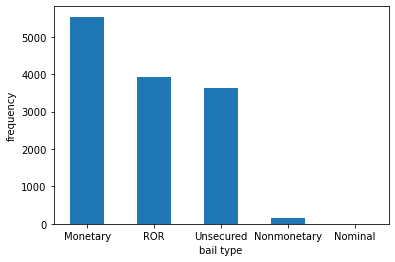

In [9]:
# types of bail
fig, ax = plt.subplots()
ax = df['bail_type'].value_counts().plot(kind = 'bar')
ax.set_xlabel('bail type')
ax.set_ylabel('frequency')
ax.xaxis.set_tick_params(rotation=0)
plt.show()

<b> Bail amount for monetary bail </b>

In [10]:
df[df["bail_type"] == "Monetary"].bail_amount.describe()

count    5.534000e+03
mean     9.940039e+04
std      2.404077e+05
min      0.000000e+00
25%      1.000000e+04
50%      2.500000e+04
75%      1.000000e+05
max      5.000000e+06
Name: bail_amount, dtype: float64

In [11]:
# median bail amount
print('median bail amount: ', df[df["bail_type"] == "Monetary"].bail_amount.median())

median bail amount:  25000.0


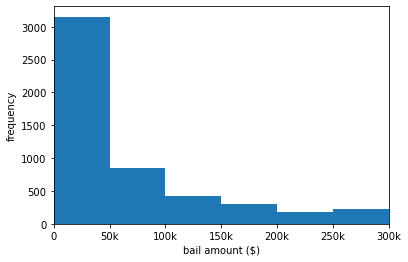

In [12]:
# distribution of bail amount for monetary bail
fig, ax = plt.subplots()
ax = df[df["bail_type"] == "Monetary"].bail_amount.plot.hist(bins = 100)
ax.set_xlim((0,300000))
ax.set_xlabel('bail amount ($)')
ax.set_ylabel('frequency')
plt.xticks(range(0, 350000, 50000), ['0','50k', '100k', '150k', '200k', '250k', '300k'])
plt.show()

In [ ]:
# median bail amount over time 

<b> Quesiton:</b> When a bail is paid, is it always 10% of the bail amount? Yes

In [13]:
# when a bail is paid, it's always 10% of the bail amount
(df[df["bail_paid"] > 0].bail_amount * 0.1 == df[df["bail_paid"] > 0].bail_paid).value_counts()

True    3005
dtype: int64

<b> Number of cases over time </b>

In [23]:
day_count = df['arrest_dt'].value_counts()
day_count.keys().max()

Timestamp('2020-07-29 00:00:00')

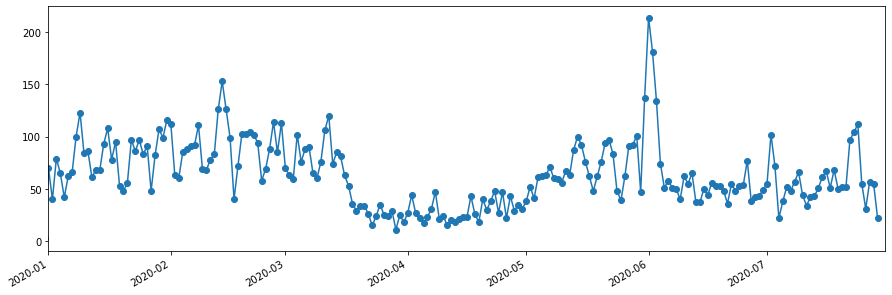

In [26]:
plt.figure(figsize = (15,5))
plt.scatter(day_count.index, day_count.values)
day_count.plot()
plt.xlim('2020-01-01','2020-07-31')
plt.show()

In [ ]:
# maybe we should exclude those arrested from 05-31 to 06-03

## Q1.1

## Q1.2 

## Q1.3

## Q2.1

## Q2.2

## Q2.3

## Q2.4